In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np 
import collections
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

sns.set_theme()
cnt = Counter()
%matplotlib inline

In [4]:
data = pd.read_csv("final_clean_data.csv")
data.clean_tweet4 = data.clean_tweet4.astype(str)
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head(2) 
data.shape


(66650, 10)

In [14]:
# Vectorization 
# Ref: https://github.com/bertcarremans/TwitterUSAirlineSentiment/blob/master/source/Predicting%20sentiment%20with%20text%20features.ipynb
#Adding stop words to the count vectorizer

from sklearn.feature_extraction import text 
my_additional_sw = [ 'im', 'day', 'us']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_sw)

cv = CountVectorizer( stop_words= stop_words)
bow = cv.fit_transform(data.clean_tweet4)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(25), columns = ['Word', 'Frequency'])

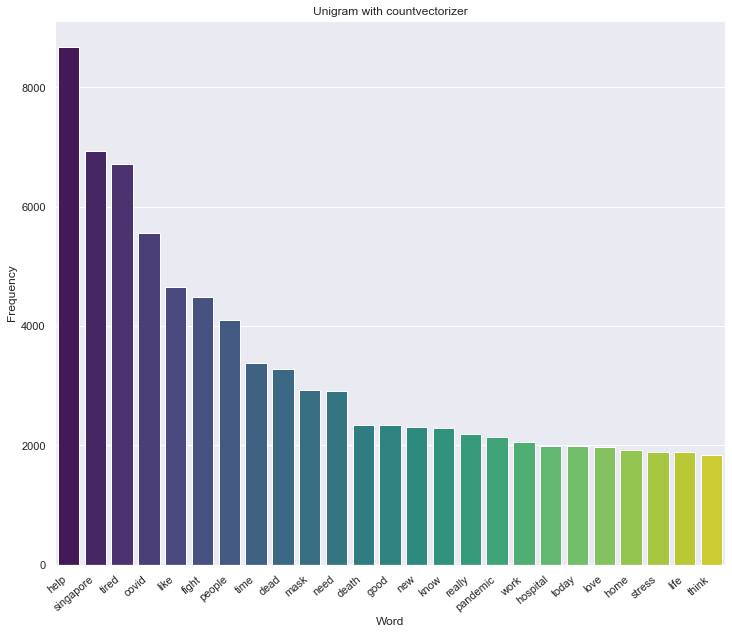

In [16]:
# Visualzie the vectorized tweets 
sns.set_theme()
fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="Word", y="Frequency", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Unigram with countvectorizer")
plt.show();

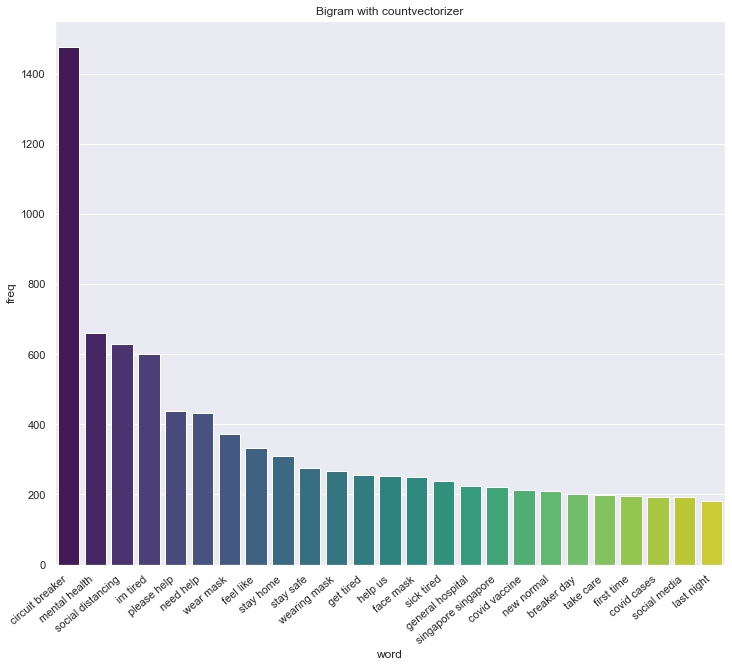

In [17]:
# Bigram with countvectorizer

cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
bow = cv.fit_transform(data.clean_tweet4)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(25), columns = ['word', 'freq'])

# Visualzie the vectorized tweets 

fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Bigram with countvectorizer")
plt.show();

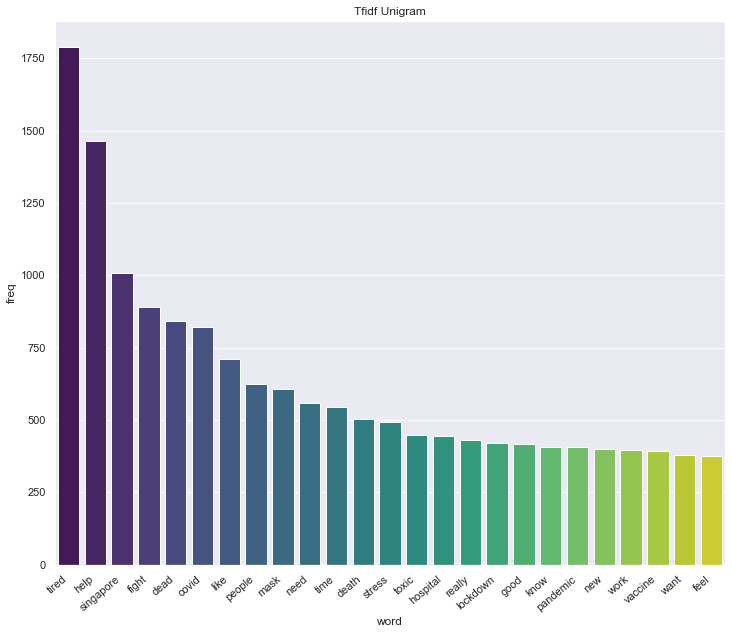

In [19]:

Tfidf = TfidfVectorizer(stop_words=stop_words)
bow = Tfidf.fit_transform(data.clean_tweet4)
word_freq = dict(zip(Tfidf.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)
word_counter_df = pd.DataFrame(word_counter.most_common(25), columns = ['word', 'freq'])

# Visualzie the vectorized tweets 
fig, ax = plt.subplots(figsize=(12, 10))
bar_freq_word = sns.barplot(x="word", y="freq", data=word_counter_df, palette="viridis", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Tfidf Unigram")
plt.show();

In [20]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 66650
n_features = 1000
n_components = 10
n_top_words = 20

#Ref: https://scikit-learn.org/0.18/auto_examples/applications/topics_extraction_with_nmf_lda.html

In [21]:
# Visualize 
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

Extracting tf-idf features for NMF...
done in 0.989s.
Extracting tf features for LDA...


 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=66650 and n_features=1000...


C:\Users\User\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


done in 13.246s.


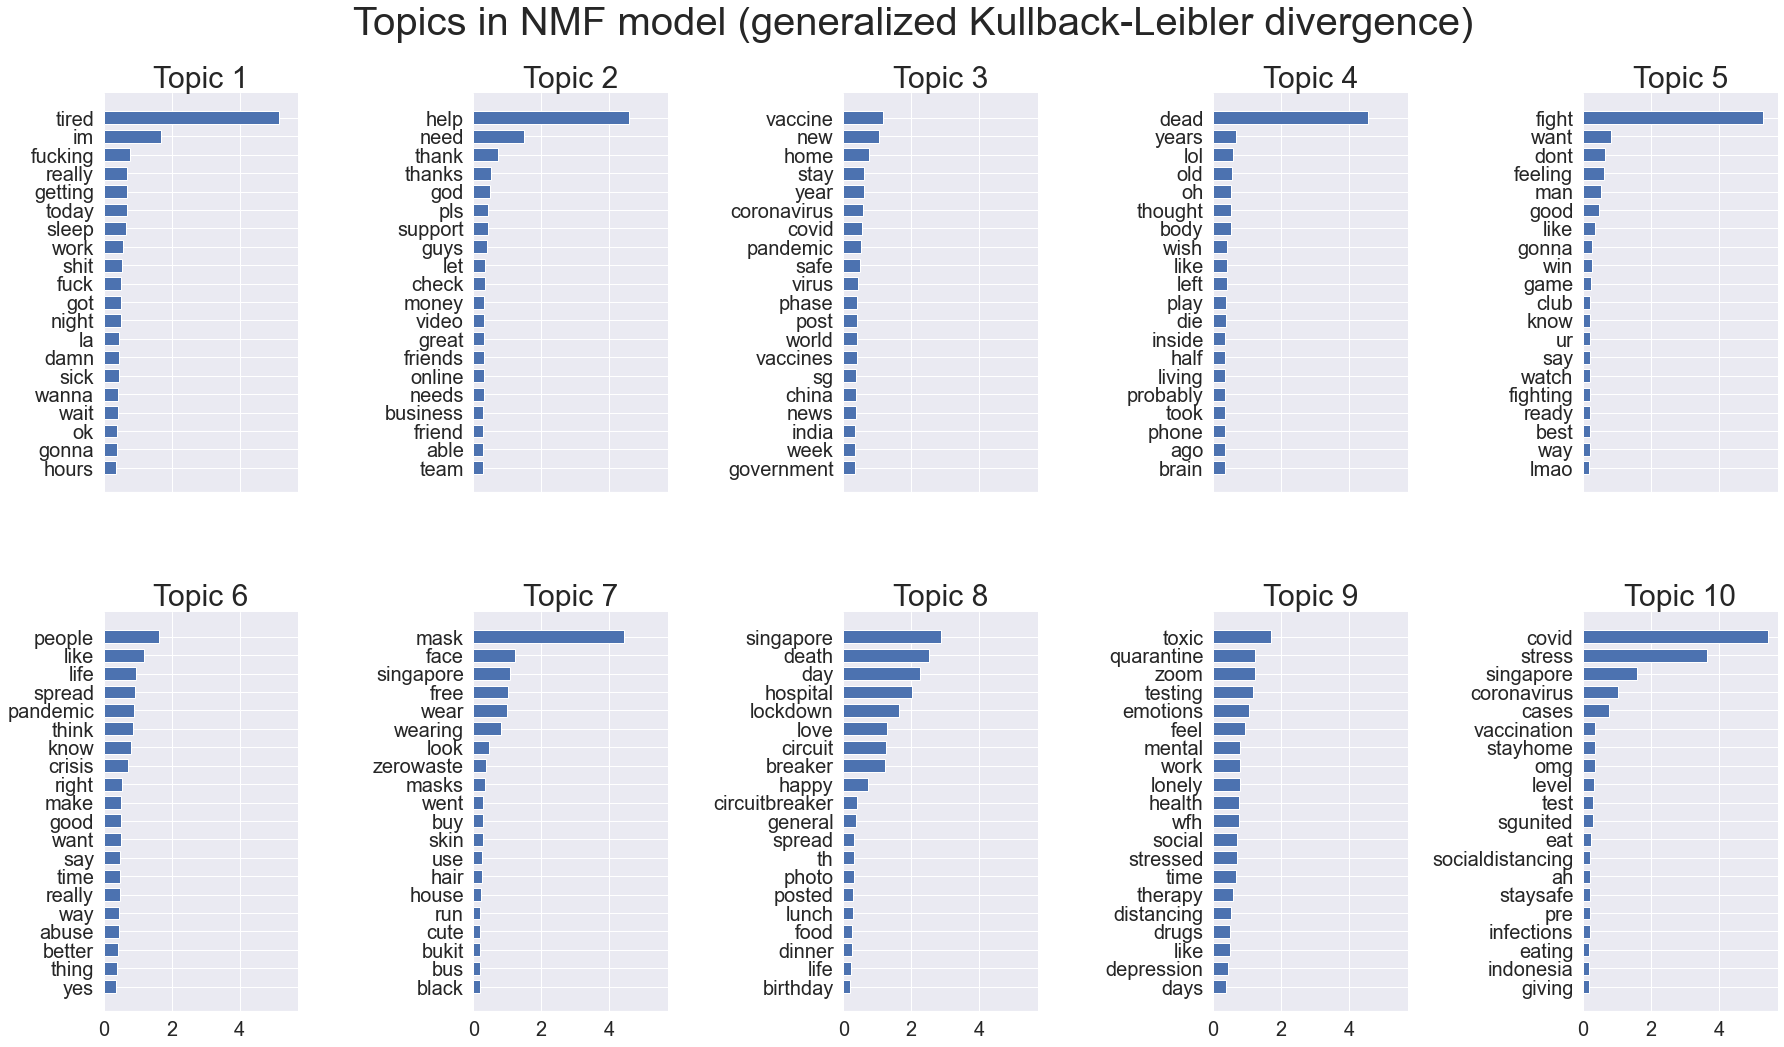



 Fitting LDA models with tf features, n_samples=66650 and n_features=1000...
done in 33.384s.


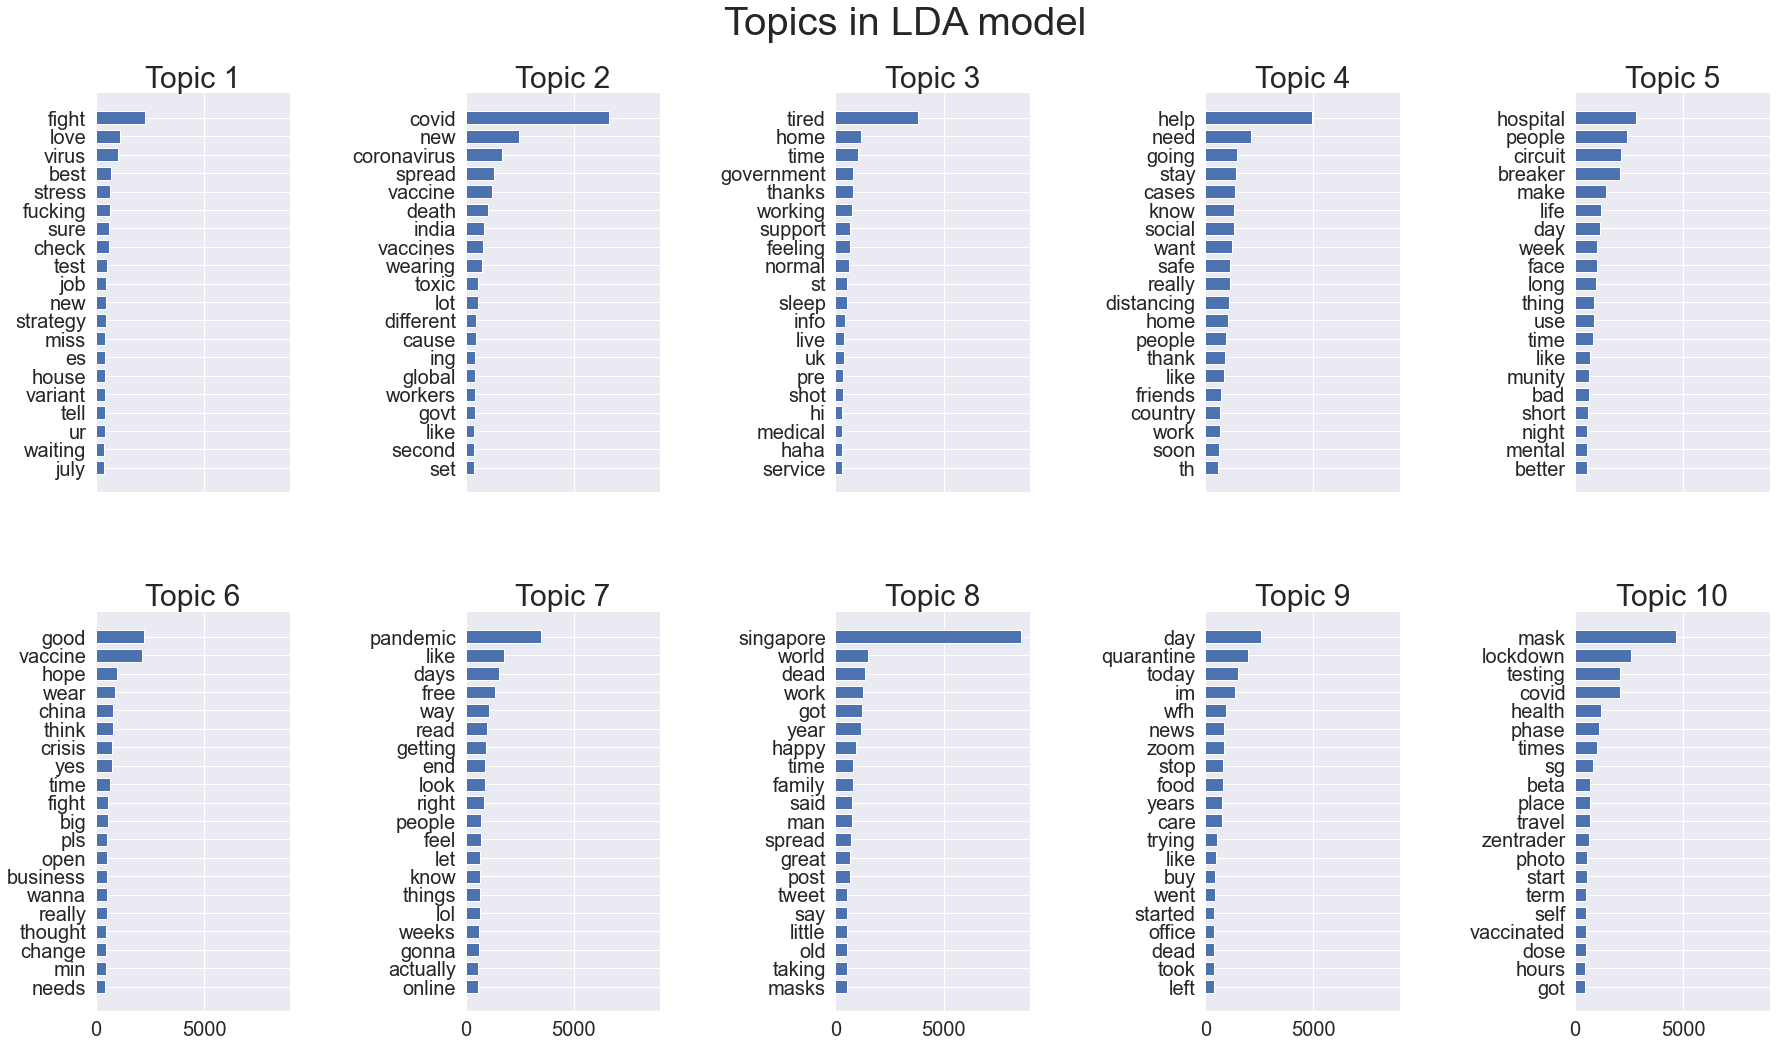

In [22]:
data_samples = data.clean_tweet4.tolist()

# Tf-idf 
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA. [Count vectorizer]
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

# Fit the NMF model and visualize 
print('\n' * 2, "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(nmf, tfidf_feature_names, n_top_words,
               'Topics in NMF model (generalized Kullback-Leibler divergence)')

# Fit to LDA model and visualize! 
print('\n' * 2, "Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, 'Topics in LDA model')

